In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import math as m
%matplotlib inline

In [159]:
df = pd.read_csv('case_study.csv', index_col=0)

In [4]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [5]:
df.shape

(34545, 358)

In [107]:
#clean based on weight

replace_dict = {
            7777: np.nan,
            9999: np.nan,
            }

df['WEIGHT2'] = df['WEIGHT2'].replace(replace_dict)
df['WEIGHT2'] = df['WEIGHT2'].apply(lambda x : clean_to_lb(x))

def clean_to_lb(x):
    if (x >= 9000) :
        return(x % 1000) * 2.20462
    return x
#df['WEIGHT2'].unique()

In [222]:
zero_dict = {1.:"Yes", 
            2.: "Yes",
            3.: "No",
            4.: "No",
            7.: "No",
            9.: np.nan
            }
df['DIABETE3'] = df['DIABETE3'].replace(zero_dict)
diabetes = df['DIABETE3'].dropna()

In [126]:
df['WEIGHT2']

49938     160.0
49939     205.0
49940       NaN
49941     165.0
49942     164.0
          ...  
303774    170.0
303775    130.0
303776    215.0
303777    138.0
303778    195.0
Name: WEIGHT2, Length: 34545, dtype: float64

In [109]:
df['DIABETE3'].unique()

array(['No', 'Yes', nan], dtype=object)

In [110]:
df['WEIGHT2']

49938     160.0
49939     205.0
49940       NaN
49941     165.0
49942     164.0
          ...  
303774    170.0
303775    130.0
303776    215.0
303777    138.0
303778    195.0
Name: WEIGHT2, Length: 34545, dtype: float64

Null Hypothesis: higher weight does not increase your chance at having diabetes

In [207]:
dmean = df.groupby('DIABETE3')['WEIGHT2'].mean()
dstd = df.groupby('DIABETE3')['WEIGHT2'].std()
n = len(df['DIABETE3'])

In [65]:
dmean['No'] - 1.96 * (dstd['No'] / (n)** (1/2))

TypeError: 'float' object is not callable

In [66]:
#x +- 1.96 (s / sqrt(n))

means = {'no': [
                dmean['No'] - 1.96 * (dstd['No'] / (n)** (1/2)) , 
                dmean['No'] + 1.96 * (dstd['No'] / (n) ** (1/2))
               ], 'yes': [
                dmean['Yes'] - 1.96 * (dstd['Yes'] / (n) ** (1/2)) , 
                dmean['Yes'] + 1.967 * (dstd['Yes'] / (n) ** (1/2))
                
]}


    

In [67]:
#sample mean confidence interval

means

{'no': [171.43811156817574, 172.3172719177832],
 'yes': [193.64939652840727, 194.6944463148307]}

In [79]:
no_count = df['DIABETE3'].value_counts()['No']
ttl = df['DIABETE3'].count()
no_prob = no_count / ttl
yes_prob = 1 - no_prob
interval = (no_prob - 1.96 * ((no_prob * yes_prob ) / ttl ) ** (1/2), 
            no_prob + 1.96 * ((no_prob * yes_prob ) / ttl ) ** (1/2)
           )

In [299]:
#sample probability confidence interval

interval

(0.8628966157740837, 0.8700735693735419)

In [233]:
#clean fruit juice
def clean_week(x) :
    if (x < 100):
        return round(x, 2)
    elif (x < 200):
        return round((x % 100), 2)
    elif (x < 300):
        return round((x % 100) / 7, 2)
    elif (x == 300):
        return 0
    elif (x < 400):
        return round((x % 100) / 12, 2)
    elif (x == 555):
        return 0
    else:
        return x
def impossibru(x):
    if ( x > 5):
        return 0
    else:
        return x

df['FRUITJU2-week'] = df['FRUITJU2'].apply(lambda x : clean_week(x))
df['FRUITJU2-week-1'] = df['FRUITJU2-week'].replace(to_replace=0.00, value=np.nan)
df['FRUITJU2-week-1-5'] = df['FRUITJU2-week-1'].apply(lambda x : impossibru(x))
df['FRUITJU2-100'] = df['FRUITJU2-week-1-5'].apply(lambda x: x * 100)
df['FRUITJU2-100'].dropna(inplace=True)

In [187]:

def clean_week(x) :
    if (x < 100):
        return round(x, 2)
    elif (x < 200):
        return round((x % 100), 2)
    elif (x < 300):
        return round((x % 100) / 7, 2)
    elif (x == 300):
        return 0
    elif (x < 400):
        return round((x % 100) / 12, 2)
    elif (x == 555):
        return 0
    else:
        return x
df['FRUITJU2'].dropna(inplace=True)
df['FRUITJU2'] = df['FRUITJU2'].apply(lambda x : clean_first(x))
def impossibru(x):
    if ( x > 5):
        return 0
    else:
        return x
df['FRUITJU2-week-1'] = df['FRUITJU2-week'].replace(to_replace=0.00, value=np.nan)
df['FRUITJU2-week-1-5'] = df['FRUITJU2-week-1'].apply(lambda x : impossibru(x))
df['FRUITJU2-week'] = df['FRUITJU2'].apply(lambda x : clean_week(x))
df['FRUITJU2-week'].replace(to_replace=777, value=np.nan, inplace=True)
df['FRUITJU2-week'].replace(to_replace=999, value=np.nan, inplace=True)
df['FRUITJU2-week'].dropna(inplace=True)
df['FRUITJU2'].dropna(inplace=True)
df['FRUITJU2-week'].value_counts()

0.00     13763
1.00      5148
0.14      1778
0.29      1758
0.43      1341
         ...  
3.50         1
12.00        1
4.29         1
0.92         1
1.42         1
Name: FRUITJU2-week, Length: 65, dtype: int64

In [164]:
df['FRUITJU2-week'].unique()

array([2.85714286e-01, 0.00000000e+00, 1.00000000e+00, 1.66666667e+00,
       8.33333333e-01, 8.33333333e-02, 1.66666667e-01, 2.00000000e+00,
       4.28571429e-01, 5.71428571e-01, 7.00000000e+00,            nan,
       4.16666667e-01, 7.14285714e-01, 2.50000000e-01, 3.33333333e-01,
       1.42857143e-01, 7.77000000e+02, 1.50000000e+01, 5.00000000e-01,
       3.00000000e+01, 1.25000000e+00, 2.50000000e+00, 5.83333333e-01,
       5.00000000e+00, 3.00000000e+00, 2.33333333e+00, 9.99000000e+02,
       6.66666667e-01, 1.16666667e+00, 8.57142857e-01, 2.08333333e+00,
       3.14285714e+00, 4.00000000e+00, 1.42857143e+00, 7.50000000e-01,
       4.28571429e+00, 1.00000000e+01, 1.50000000e+00, 2.25000000e+00,
       1.33333333e+00, 2.41666667e+00, 2.00000000e+01, 8.00000000e+00,
       6.00000000e+00, 1.14285714e+00, 2.85714286e+00, 2.58333333e+00,
       2.42857143e+00, 9.16666667e-01, 1.75000000e+00, 1.71428571e+00,
       8.25000000e+00, 2.75000000e+00, 7.50000000e+01, 3.58333333e+00,
      

In [83]:
interval = (no_prob - 1.96 * ((no_prob * yes_prob ) / ttl ) ** (1/2), 
            no_prob + 1.96 * ((no_prob * yes_prob ) / ttl ) ** (1/2)
           )


In [217]:
df['FRUITJU2-week-1-5'].value_counts()
df['FRUITJU2-100'] = df['FRUITJU2-week-1-5'].apply(lambda x: x * 100)

In [244]:
#two sample prop t-test
white_count = df['_IMPRACE'].value_counts()['White']
white_count
ttl_white_count = df['_IMPRACE'].count()
white_prob = white_count / ttl
white_prob
yes_prob

0.1335149074261872

In [261]:
p1 = yes_prob
p2 = white_prob
n1 = ttl_white_count
n2 = df['DIABETE3'].count()
p_hat = (white_count + df['DIABETE3'].value_counts()['Yes']) / (df['_IMPRACE'].count() + df['DIABETE3'].count())


numerator = p1 - p2
prob_of_hats = (p_hat * (1 - p_hat))
fracts = (1 / n1) + (1/n2)
sqrt = (prob_of_hats * fracts) ** (1/2)
z = numerator / sqrt
z

-156.67082027651836

In [236]:
#h0 = weight has no effect on how much juice you drink 
#reject null hypothesis
#two sample t-test
mjuice = df['FRUITJU2-100'].mean()
stdjuice = df['FRUITJU2-100'].std()
njuice = df['FRUITJU2-100'].count()
wmean = df['WEIGHT2'].mean()
wstd = df['WEIGHT2'].std()
nweight = df['WEIGHT2'].count()
statistic, pvalue = stats.ttest_ind_from_stats(wmean, wstd, nweight, mjuice, stdjuice, njuice)
statistic


42.83337030653597

In [232]:
df['FRUITJU2-100'].unique()

array([ 29.,  nan, 100., 167.,  83.,   8.,  17., 200.,  43.,  57.,   0.,
        42.,  71.,  25.,  33.,  14.,  50., 125., 250.,  58., 500., 300.,
       233.,  67., 117.,  86., 208., 314., 400., 143.,  75., 429., 150.,
       225., 133., 242., 114., 286., 258., 243.,  92., 175., 171., 275.,
       358., 333., 350., 329., 267., 357., 142., 214., 417., 183., 129.])

In [171]:
fruit_mean = df['FRUITJU2-week'].mean()
fruit_std = df['FRUITJU2-week'].std()


In [224]:
df.groupby('DIABETE3')['FRUITJU2-100'].count()

DIABETE3
No     15814
Yes     2046
Name: FRUITJU2-100, dtype: int64

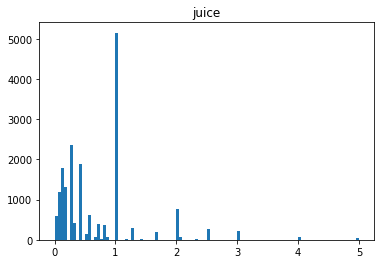

In [302]:
def impossibru(x):
    if ( x > 5):
        return 0
    else:
        return x
df['FRUITJU2-week-1'] = df['FRUITJU2-week'].replace(to_replace=0.00, value=np.nan)
df['FRUITJU2-week-1-5'] = df['FRUITJU2-week-1'].apply(lambda x : impossibru(x))

plt.hist(df['FRUITJU2-week-1-5'], bins=100)
plt.title('juice')
plt.show()

In [198]:
df['FRUITJU2-week-1-5'].count()

17870

In [225]:
zero_dict = {1.:"White",
            2.: "Black",
            3.: "Asian",
            4.: "Native",
            5.: "Hispanic",
            6.: "Other"}
df['_IMPRACE'] = df['_IMPRACE'].replace(zero_dict)
race = df['_IMPRACE'].dropna()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [273]:
#race does not effect idividuals having diabetes

diabetic_races = df.groupby('_IMPRACE')['DIABETE3'].value_counts()
pd.crosstab()

In [287]:
diabetic_races
df['_IMPRACE'].count()

34545

In [291]:
ttl_no = 1074+2682+3479+170+611+21889
ttl_yes = 142 + 639 + 604 + 170 + 101 + 3080
ttl_white = df['_IMPRACE'].value_counts()['White']
ttl_black = df['_IMPRACE'].value_counts()['Black']
ttl_asian = df['_IMPRACE'].value_counts()['Asian']
ttl_native = df['_IMPRACE'].value_counts()['Native']
ttl_other = df['_IMPRACE'].value_counts()['Other']
ttl_hispanic = df['_IMPRACE'].value_counts()['Hispanic']
ttlttl = df['_IMPRACE'].count()
weight_yes = ttl_yes / ttlttl
weight_no = ttl_no / ttlttl
races = [ttl_white, ttl_black, ttl_asian, ttl_native, ttl_other, ttl_hispanic]
weighted_yeses = []
weighted_nos = []
for ttl in races:
    weighted_yeses.append(weight_yes * ttl)
    weighted_nos.append(weight_no * ttl)

In [294]:
diabetic_races

_IMPRACE  DIABETE3
Asian     No           1074
          Yes           142
Black     No           2682
          Yes           639
Hispanic  No           3479
          Yes           604
Native    No            170
          Yes            42
Other     No            611
          Yes           101
White     No          21889
          Yes          3080
Name: DIABETE3, dtype: int64

In [314]:
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,FRUITJU2-week,FRUITJU2-week-1,FRUITJU2-week-1-5,FRUITJU2-100
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,1.0,1.0,NaN,NaN,1.0,0.29,0.29,0.29,29.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,2.0,2.0,NaN,NaN,2.0,0.29,0.29,0.29,29.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,2.0,1.0,1.0,NaN,NaN,2.0,0.00,NaN,NaN,NaN
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,1.0,1.0,NaN,NaN,1.0,0.00,NaN,NaN,NaN
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,1.0,1.0,1.0,NaN,NaN,2.0,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,2.0,1.0,1.0,NaN,NaN,1.0,1.00,1.00,1.00,100.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,1.0,1.0,NaN,NaN,1.0,1.00,1.00,1.00,100.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,1.0,1.0,NaN,NaN,1.0,0.00,NaN,NaN,NaN
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,999.00,999.00,0.00,0.0


In [312]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
table  = [[1074, 2682, 3479, 170, 611, 21889], [142, 639, 604, 42, 101, 3080]]

stat, p, dof, expected = chi2_contingency(table)
#weighted_yeses
print('dof=%d' % dof)
print(expected)
prob1 = .95
critical = chi2.ppf(prob1, dof)
#critical
print('H0 = You\'r race does not affect having diabetes')
print('probability=%.3f, critical=%.3f, stat=%.3f' %(prob1, critical, stat))
if (abs(stat) >= critical):
    print('dependent (reject H0)')
else:
    print('independent (fail to reject H0)')
#summation( ( original - expected) ** 2 / exp) 

dof=5
[[ 1053.64587257  2877.59699244  3537.85863298   183.69483963
    616.93738591 21635.26627648]
 [  162.35412743   443.40300756   545.14136702    28.30516037
     95.06261409  3333.73372352]]
H0 = You'r race does not affect having diabetes
probability=0.950, critical=11.070, stat=140.220
dependent (reject H0)


In [ ]:
#nova


In [316]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
anova_season = ols('WEIGHT2~_IMPRACE', data=df).fit()

In [325]:
anova_table = sm.stats.anova_lm(anova_season, type=2)
print(anova_table)
df['WEIGHT2'].dropna(inplace=True)

               df        sum_sq       mean_sq         F        PR(>F)
_IMPRACE      5.0  2.430349e+08  4.860698e+07  8.939442  1.693340e-08
Residual  33963.0  1.846691e+11  5.437362e+06       NaN           NaN


In [335]:

statfway, pvaluefway = stats.f_oneway(df['WEIGHT2'][df['_IMPRACE'] == 'White'],
              df['WEIGHT2'][df['_IMPRACE'] == 'Black'],
               df['WEIGHT2'][df['_IMPRACE'] == 'Asian'],
               df['WEIGHT2'][df['_IMPRACE'] == 'Hispanic'],
               df['WEIGHT2'][df['_IMPRACE'] == 'Other'],
               df['WEIGHT2'][df['_IMPRACE'] == 'Native'])
print('H0 = Race does not affect weight')
print('HA = Race affects weight')
print('PValue = {} :: Failed to reject H0'.format(pvaluefway))


H0 = Race does not affect weight
HA = Race affects weight
PValue = 1.6933404646851255e-08 :: Failed to reject H0


(array([8., 3., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([   42. ,  2226.7,  4411.4,  6596.1,  8780.8, 10965.5, 13150.2,
        15334.9, 17519.6, 19704.3, 21889. ]),
 <a list of 10 Patch objects>)

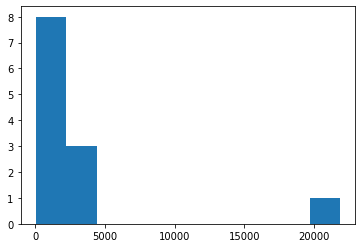

In [295]:
plt.hist(diabetic_races)

(array([24997.,     0.,  1216.,     0.,  4084.,     0.,  3323.,     0.,
          713.,   212.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

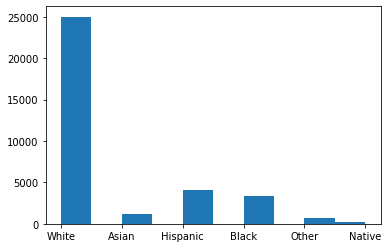

In [296]:
plt.hist(df['_IMPRACE'])

(array([29905.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4608.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

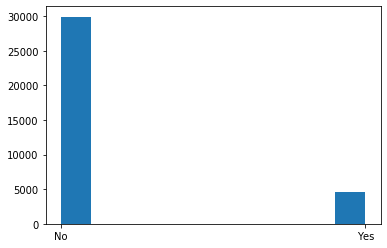

In [298]:
df['DIABETE3'].dropna(inplace=True)
plt.hist(df['DIABETE3'])

In [ ]:
#stats.chi_2contigency()
#ststs.f_oneway()